<a href="https://colab.research.google.com/github/viviToT97/ProyectoFinal/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

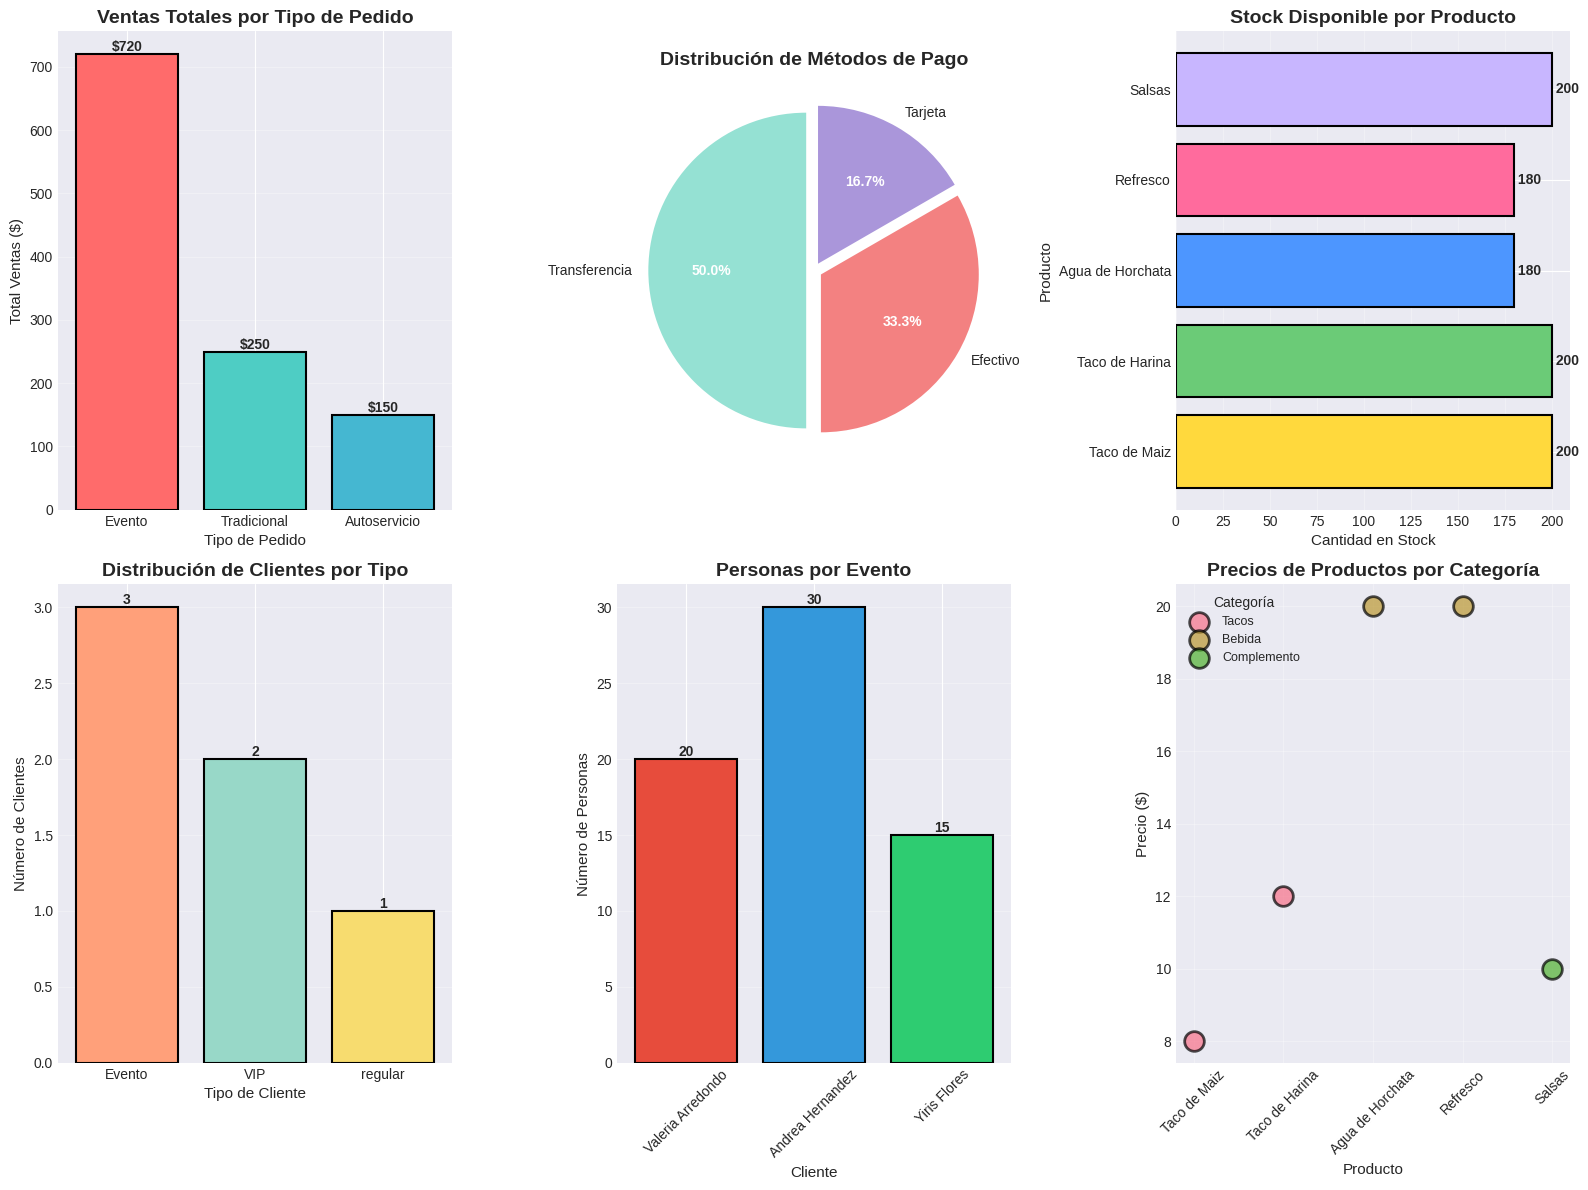


📊 RESUMEN DE ESTADÍSTICAS

💰 VENTAS:
   • Total de ventas: $1,120.00
   • Venta promedio: $186.67
   • Venta máxima: $320.00
   • Venta mínima: $70.00

👥 CLIENTES:
   • Total de clientes: 6
   • Clientes VIP: 2
   • Clientes de Eventos: 3

📦 INVENTARIO:
   • Total productos en stock: 960
   • Valor total del inventario: $13,200.00

🎉 EVENTOS:
   • Total de eventos: 3
   • Total de personas atendidas: 65
   • Promedio de personas por evento: 21.7



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ==================== DATOS ====================

# Clientes
clientes = pd.DataFrame({
    'id_cliente': [1, 2, 3, 4, 5, 6],
    'nombre': ['Valeria Arredondo', 'Adilene Vega', 'Linnet Ruiz',
               'Fernanda Castro', 'Andrea Hernandez', 'Yiris Flores'],
    'telefono': ['6688203457', '6681853871', '6981065095',
                 '6682497001', '66847951235', '668574152369'],
    'email': ['val@gmail.com', 'adi@gmail.com', 'lin@gmail.com',
              '@fer@gmail.com', 'andi@gmail.com', 'yiyi@gmail.com'],
    'tipo_cliente': ['Evento', 'regular', 'VIP', 'VIP', 'Evento', 'Evento']
})

# Productos
productos = pd.DataFrame({
    'id_producto': [1, 2, 3, 4, 5],
    'nombre': ['Taco de Maiz', 'Taco de Harina', 'Agua de Horchata',
               'Refresco', 'Salsas'],
    'precio': [8, 12, 20, 20, 10],
    'categoria': ['Tacos', 'Tacos', 'Bebida', 'Bebida', 'Complemento']
})

# Inventario
inventario = pd.DataFrame({
    'id_inventario': [1, 2, 3, 4, 5],
    'id_producto': [1, 2, 3, 4, 5],
    'Stock': [200, 200, 180, 180, 200],
    'Costo_Unitario': [8, 12, 20, 20, 10]
})

# Pedidos
pedidos = pd.DataFrame({
    'id_pedido': [1, 2, 3, 4, 5, 6],
    'id_cliente': [2, 3, 4, 1, 5, 6],
    'tipo_pedido': ['Tradicional', 'Tradicional', 'Autoservicio',
                    'Evento', 'Evento', 'Evento'],
    'total': [70, 180, 150, 250, 320, 150],
    'Metodo_pago': ['Efectivo', 'Tarjeta', 'Transferencia',
                    'Transferencia', 'Transferencia', 'Efectivo']
})

# Eventos
eventos = pd.DataFrame({
    'id_evento': [1, 2, 3],
    'id_cliente': [1, 5, 6],
    'id_pedido': [4, 5, 6],
    'numero_personas': [20, 30, 15]
})

# ==================== GRÁFICAS ====================

fig = plt.figure(figsize=(16, 12))

# 1. Ventas Totales por Tipo de Pedido
ax1 = plt.subplot(2, 3, 1)
ventas_tipo = pedidos.groupby('tipo_pedido')['total'].sum().sort_values(ascending=False)
colors1 = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars1 = ax1.bar(ventas_tipo.index, ventas_tipo.values, color=colors1, edgecolor='black', linewidth=1.5)
ax1.set_title('Ventas Totales por Tipo de Pedido', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Ventas ($)', fontsize=11)
ax1.set_xlabel('Tipo de Pedido', fontsize=11)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 2. Distribución de Métodos de Pago
ax2 = plt.subplot(2, 3, 2)
metodos_pago = pedidos['Metodo_pago'].value_counts()
colors2 = ['#95E1D3', '#F38181', '#AA96DA']
wedges, texts, autotexts = ax2.pie(metodos_pago.values, labels=metodos_pago.index,
                                     autopct='%1.1f%%', startangle=90, colors=colors2,
                                     explode=[0.05]*len(metodos_pago))
ax2.set_title('Distribución de Métodos de Pago', fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# 3. Stock de Inventario
ax3 = plt.subplot(2, 3, 3)
inv_productos = inventario.merge(productos, on='id_producto')
colors3 = ['#FFD93D', '#6BCB77', '#4D96FF', '#FF6B9D', '#C8B6FF']
bars3 = ax3.barh(inv_productos['nombre'], inv_productos['Stock'], color=colors3, edgecolor='black', linewidth=1.5)
ax3.set_title('Stock Disponible por Producto', fontsize=14, fontweight='bold')
ax3.set_xlabel('Cantidad en Stock', fontsize=11)
ax3.set_ylabel('Producto', fontsize=11)
for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2.,
             f' {width:.0f}',
             ha='left', va='center', fontsize=10, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 4. Número de Clientes por Tipo
ax4 = plt.subplot(2, 3, 4)
tipo_cliente = clientes['tipo_cliente'].value_counts()
colors4 = ['#FFA07A', '#98D8C8', '#F7DC6F']
bars4 = ax4.bar(tipo_cliente.index, tipo_cliente.values, color=colors4, edgecolor='black', linewidth=1.5)
ax4.set_title('Distribución de Clientes por Tipo', fontsize=14, fontweight='bold')
ax4.set_ylabel('Número de Clientes', fontsize=11)
ax4.set_xlabel('Tipo de Cliente', fontsize=11)
for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# 5. Personas Atendidas en Eventos
ax5 = plt.subplot(2, 3, 5)
eventos_clientes = eventos.merge(clientes, on='id_cliente')
colors5 = ['#E74C3C', '#3498DB', '#2ECC71']
bars5 = ax5.bar(eventos_clientes['nombre'], eventos_clientes['numero_personas'],
                color=colors5, edgecolor='black', linewidth=1.5)
ax5.set_title('Personas por Evento', fontsize=14, fontweight='bold')
ax5.set_ylabel('Número de Personas', fontsize=11)
ax5.set_xlabel('Cliente', fontsize=11)
ax5.tick_params(axis='x', rotation=45)
for bar in bars5:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# 6. Precios de Productos por Categoría
ax6 = plt.subplot(2, 3, 6)
for categoria in productos['categoria'].unique():
    prods_cat = productos[productos['categoria'] == categoria]
    ax6.scatter(prods_cat['nombre'], prods_cat['precio'],
               label=categoria, s=200, alpha=0.7, edgecolors='black', linewidth=2)
ax6.set_title('Precios de Productos por Categoría', fontsize=14, fontweight='bold')
ax6.set_ylabel('Precio ($)', fontsize=11)
ax6.set_xlabel('Producto', fontsize=11)
ax6.tick_params(axis='x', rotation=45)
ax6.legend(title='Categoría', fontsize=9)
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ==================== ESTADÍSTICAS ====================

print("\n" + "="*60)
print("📊 RESUMEN DE ESTADÍSTICAS")
print("="*60)

print(f"\n💰 VENTAS:")
print(f"   • Total de ventas: ${pedidos['total'].sum():,.2f}")
print(f"   • Venta promedio: ${pedidos['total'].mean():,.2f}")
print(f"   • Venta máxima: ${pedidos['total'].max():,.2f}")
print(f"   • Venta mínima: ${pedidos['total'].min():,.2f}")

print(f"\n👥 CLIENTES:")
print(f"   • Total de clientes: {len(clientes)}")
print(f"   • Clientes VIP: {len(clientes[clientes['tipo_cliente'] == 'VIP'])}")
print(f"   • Clientes de Eventos: {len(clientes[clientes['tipo_cliente'] == 'Evento'])}")

print(f"\n📦 INVENTARIO:")
print(f"   • Total productos en stock: {inventario['Stock'].sum()}")
print(f"   • Valor total del inventario: ${(inventario['Stock'] * inventario['Costo_Unitario']).sum():,.2f}")

print(f"\n🎉 EVENTOS:")
print(f"   • Total de eventos: {len(eventos)}")
print(f"   • Total de personas atendidas: {eventos['numero_personas'].sum()}")
print(f"   • Promedio de personas por evento: {eventos['numero_personas'].mean():.1f}")

print("\n" + "="*60)